# Machine Learning

In this homework we will gain experience on Applied Machine Learning, exploring an interesting dataset about soccer players and referees. 

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt  
% matplotlib inline
import random
from datetime import datetime
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
import sklearn as sk
from sklearn import preprocessing, ensemble
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

/Users/peco/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("CrowdstormingDataJuly1st.csv")

## 1. Data cleaning

First, let us have a look at the data, with respect to the comprehensive description of it's variable in DATA.md. Here we describe and observe the data (10 first rows).

In [3]:
df.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,177.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,641.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,182.000000,76.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1604.000000,21.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2345.000000,44.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [4]:
df.ix[:5,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0


In [5]:
df.ix[:5,13:30]


,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


### Dyad organization and data disaggregation
The data is actually organized as [dyad](http://en.wikipedia.org/wiki/Dyad_(sociology).


As explained [here](http://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb), the data is organized as dyad, so each row corresponds to a player and a referee relationship. Some players encoutered a referee only once, and some players encoutered a referee several time, but this will still be represented as a single row.

What will be done is to disaggregate the data so that each row corrresponds to one referee-player encouter. To disaggregate, we will use the number of *games*, and consider logically that a maximum of 1 *red card* is possible by encouter.

In [7]:
print(df.shape)
len_disaggregate = sum(df['games']); ## all games
disaggregate = np.zeros(shape = [len_disaggregate, df.shape[1]], dtype=object)
df['allreds']=df['yellowReds']+df['redCards']

j=0
for i, row in df.iterrows():
    row_red = row['allreds']
    for game in range(row['games']):
        row['allreds'] = 1 if (row_red - game > 0) else 0
        disaggregate[j] = row
        j+=1
        
pd.DataFrame(disaggregate, columns=list(df.columns)).to_csv('crowdstorm_disaggregated.csv', index=False, encoding="utf-8") 

(146028, 29)


### Reload data
For clarity, we reload here the disaggregated data in our dataframe.

In [8]:
df = pd.read_csv("crowdstorm_disaggregated.csv", encoding = "utf-8")
nb_dyads = df.size

### Cleaning Data
There is an interesting fact about the dyads to consider : although a referee should have at least 22 relations with players, since a single game implies a minimum of two teams of eleven players, some referees have less (actually, more than half, one can quickly get from the graph), as is shown below:
The interpretation of this oddity is given [in this other take on our dataset](http://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb).

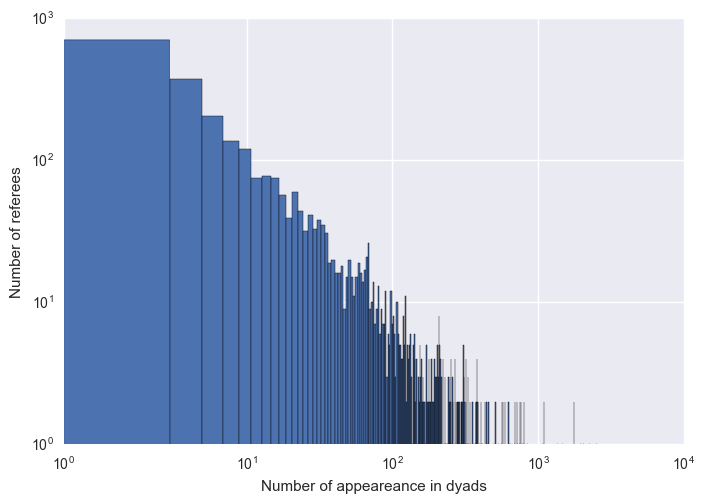

In [9]:
all_refs = df['refNum'].value_counts()
number_all_refs = len(all_refs)
plt.hist(all_refs, log=True, bins = number_all_refs)
plt.xscale('symlog')
plt.ylabel('Number of referees')
plt.xlabel('Number of appeareance in dyads')

From the graph, we can see that around 1000 referees have encoutered less than 10 players. This will be problematic for our analysis, and hence **we will eliminate all the referees that have less than 22 encouters from our dataset**. We are left with 1261 referees, out of our initial N = 3147, wich is only but a little more than a third of our initial set. However, as we further see below, 97.5% of our initial dyads are kept, and therefore our important cleaning step hasn't impaired the integrity of our data.

In [10]:
df=df[df['refNum'].isin(all_refs[all_refs>=22].index.values)]
#number of referees left after cleaning
df['refNum'].unique().size

1261

In [11]:
#percentage of dyads left after cleaning
df.size * 100 / nb_dyads

97.449434093189424

### Null Data
Now let us check whether there are any null data in our set.

In [12]:
df.isnull().any()

playerShort      False
player           False
club             False
leagueCountry    False
birthday         False
height            True
weight            True
position          True
games            False
victories        False
ties             False
defeats          False
goals            False
yellowCards      False
yellowReds       False
redCards         False
photoID           True
rater1            True
rater2            True
refNum           False
refCountry       False
Alpha_3          False
meanIAT           True
nIAT              True
seIAT             True
meanExp           True
nExp              True
seExp             True
allreds          False
dtype: bool

We can see that indeed some data is missing, and this is especially the case for *rater1* and *rater2*. We will drop the rows where said data is missing. We now have lost 20% of our initial data, but the fair 80% left should be clean enough so that we can we can run a good enough analysis on them.

In [13]:
df.count()
df = df.dropna()
df.size * 100 / nb_dyads

80.183415695357411

### Aggregation of the data
We will now reorganize the data, by aggregating it around players.

**Assumptions** :
    - one's club does not change over 1 season.
    - one's position does not change over 1 season.

We need to keep only certain practical player informations. We will hence **drop** some informations that are useless for the rest of the analysis:
    - refNum     (belongs to referee)
    - refCountry     (belongs to referee)
    - playerShort (useless - a player's id. We will use it for grouping purpose, and then discard it.)
    - player
    - photoID
    
there are still variables linked to the referees, we will deal with them later.

In [14]:
df_p = df.groupby('playerShort', as_index=False,sort=True)
aggregation = {'club':'max',
               'leagueCountry':'max',
               'birthday':'max',
               'height':'mean',
               'weight':'mean', 
               'position':'max',
               'games':'sum',
               'victories':'sum',
               'ties':'sum',
               'defeats':'sum',
               'goals':'sum',
               'rater1':'mean',
               'rater2':'mean',
               'yellowCards':'sum',
               'redCards':'sum',
               'meanIAT':'mean',
               'nIAT':'sum',
               'seIAT':'mean',
               'meanExp':'mean',
               'nExp':'sum',
               'seExp':'mean'
              }
df_p = df_p.agg(aggregation)
df_p.drop(['playerShort'],inplace=True,axis=1,errors='ignore')

df_p.describe()

,seExp,height,rater2,redCards,games,nIAT,meanIAT,victories,weight,goals,defeats,yellowCards,ties,rater1,nExp,meanExp,seIAT
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1.418000e+03,1418.000000,1418.000000,1418.000000,1418.00000,1418.000000,1418.000000,1418.000000,1418.000000,1.418000e+03,1418.000000,1418.000000
mean,0.001399,182.159379,0.304126,7.225670,1818.977433,3.933122e+06,0.347126,820.600141,76.263047,211.35402,561.917489,242.483780,436.459803,0.261460,4.096284e+06,0.444205,0.000293
std,0.001957,6.799995,0.292711,13.087291,1963.852817,6.193912e+06,0.014516,1019.439932,7.105262,428.63188,573.695929,290.131377,464.389587,0.293726,6.442677e+06,0.101160,0.000390
min,0.000037,161.000000,0.000000,0.000000,1.000000,1.451000e+03,0.287530,0.000000,55.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.501000e+03,0.065271,0.000010
25%,0.000547,178.000000,0.000000,0.000000,508.000000,5.742390e+05,0.336628,197.000000,71.000000,14.00000,173.000000,54.000000,124.000000,0.000000,5.953838e+05,0.361671,0.000120
50%,0.001002,182.500000,0.250000,1.000000,1204.000000,1.493888e+06,0.340851,497.000000,76.000000,69.00000,384.500000,148.000000,288.000000,0.250000,1.541454e+06,0.402253,0.000229
75%,0.001437,187.000000,0.500000,9.750000,2426.500000,4.137155e+06,0.361154,1068.750000,81.000000,221.50000,749.750000,320.000000,581.500000,0.250000,4.309695e+06,0.551277,0.000306
max,0.045650,203.000000,1.000000,121.000000,16932.000000,7.044169e+07,0.396512,10092.000000,100.000000,5141.00000,4269.000000,2361.000000,3559.000000,1.000000,7.245802e+07,1.031407,0.009063


### Distributions of skin color indicators
There are 2 indicators for a player's skin color : *rater1* and *rater2*. 
Let's have a look at them

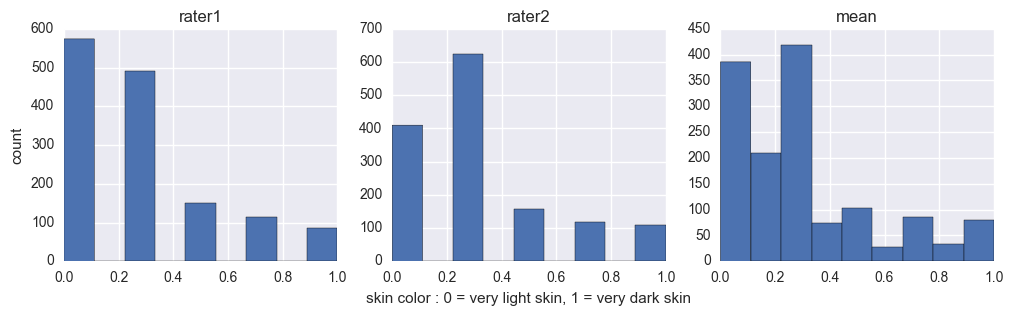

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12, 3))
df_p['rater1'].hist(ax=ax[0], bins=9)
ax[0].set_ylabel('count')
ax[0].set_title('rater1')

df_p['rater2'].hist(ax=ax[1], bins=9)
ax[1].set_xlabel('skin color : 0 = very light skin, 1 = very dark skin')
ax[1].set_title('rater2')

#mean
mean_rater = (df_p['rater2'] + df_p['rater1'])/2
(mean_rater).hist(ax=ax[2], bins=9)
ax[2].set_title('mean')


How many different values do we consider with rater1, rater2 and their mean ?

We assign them to 3 classes : 
- rather white skin
- rather dark skin
- in between


rater1
[0.0, 0.25, 0.5, 0.75, 1.0]
5
rater2
[0.0, 0.25, 0.5, 0.75, 1.0]
5
mean of rater 1 and rater 2
[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
9
[0.0, 1.0]
2


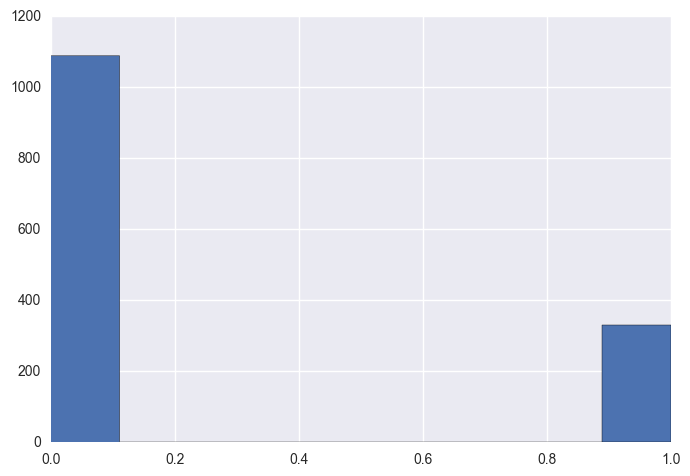

In [16]:
values_rater1 = sorted(df_p['rater1'].unique())
print('rater1')
print(values_rater1)
print(len(values_rater1))

values_rater2 = sorted(df_p['rater2'].unique())
print('rater2')
print(values_rater2)
print(len(values_rater2))

value_mean_rater = sorted(mean_rater.unique())
print('mean of rater 1 and rater 2')
print(value_mean_rater)
print(len(value_mean_rater))


# We assign to 3 classes the value2
mean_rater[(mean_rater >= 0) & (mean_rater<0.5)] = 0
#mean_rater[(mean_rater >= 0.33) & (mean_rater<0.67)] = 0.5
mean_rater[mean_rater>= 0.5] = 1

value_mean_rater = sorted(mean_rater.unique())

print(value_mean_rater)
print(len(value_mean_rater))
mean_rater.hist(bins=9) 

Let's create a new column with the new  skin color.

In [17]:
df_p['mean_rater'] = mean_rater
df_p.drop(['rater1','rater2'],inplace=True,axis=1,errors='ignore')


#### Manage date data
We will only keep the age of the player.

In [18]:
df_p['birthday'] = pd.to_datetime(df_p['birthday'])
df_p['age'] = np.round((datetime.now() - df_p['birthday']).dt.days/365.2425).astype(np.int16)
df_p.drop(['birthday'],inplace=True,axis=1,errors='ignore')

## 2. Data exploration

Let's see if some colums (= attribute about a player) in the data might be correlated.

We can see that the number of victories, the number of goals and the number of games are highly correlated.
We also see that meanExp and MeanIAT are highly correlated, as well as seIAT and seEXP.

Correlation doesn't imply causation, but knowing correlation between features will be helpfull in the feature analysis of the classification.

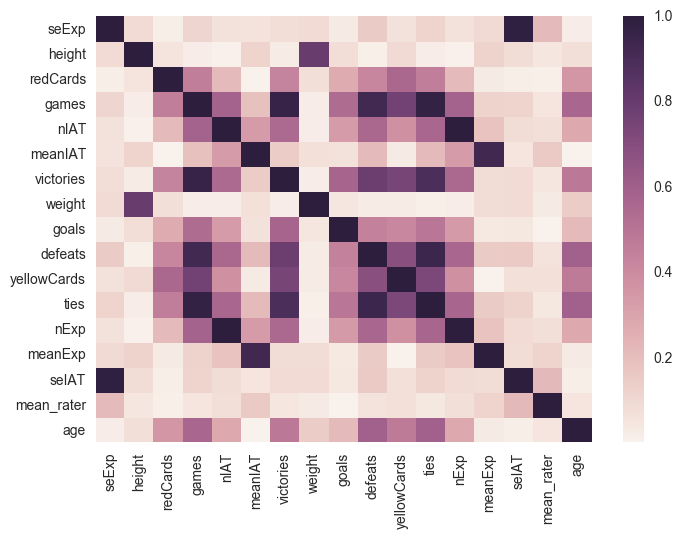

In [19]:
corr = np.abs(df_p.corr())
hm = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

By displaying the correlation between the color of the skin and the player's characteristics, we can see if there features that already appear.

However, it is not really the case.

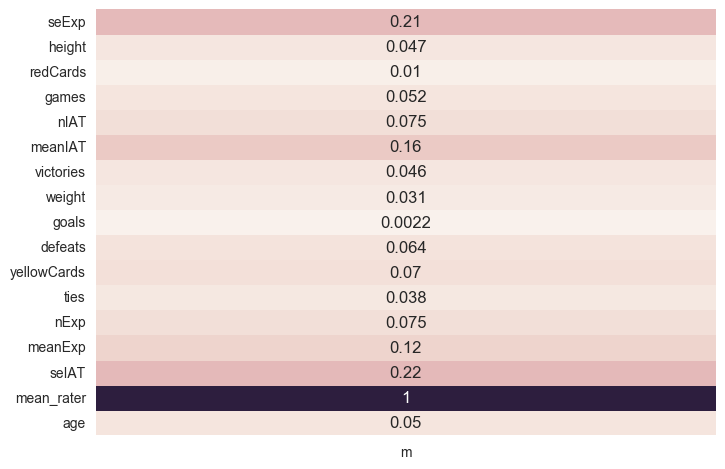

In [20]:
row = corr['mean_rater']
hm = sns.heatmap(row[:, None],xticklabels='mean_rater',yticklabels=corr.columns.values,annot=True,cbar=None)

## Manage categorical data
We transform categorical data into numerical data. Randomforest can deal with categorical data, but in scikit-learn, the function will only accept numbers as features. Moreover the numbers will be considered as continuous. Therefore there will be a problem with ordering. More information [here](http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)

We will create new binary features to handle the categorical variable.

In [21]:
def convertCatDummy(df, x):
    result_dummies = pd.get_dummies(df_p[x])
    df = pd.concat([df, result_dummies], axis=1)
    df.drop([x],axis=1, inplace=True,errors='ignore')
    return df

df_p = convertCatDummy(df_p, 'leagueCountry')
#df_p = convertCatDummy(df_p, 'club')
df_p = convertCatDummy(df_p, 'position')



## Delete variable

When we ran our model, we saw that the clubs were features that had a really small impact. When converting this categorical feature into dummies feature, the size of the data increased (because the number of feature increased). 

We decide to remove the following columns:
- nIAT
- nExp
- refCountry
- club

In [22]:
df_p.drop(['nIAT','nExp','refCountry','club'],inplace=True,axis=1,errors='ignore')
#df_p.drop(['leagueCountry'],inplace=True,axis=1,errors='ignore')

## Export and save the dataFrame 

In [23]:
pd.DataFrame(df_p, columns=list(df_p.columns)).to_csv('crowdstorm_players_aggregated.csv', index=False, encoding="utf-8") 